In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
users = pd.read_csv("takehome_users.csv")
usage = pd.read_csv("takehome_user_engagement.csv")

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

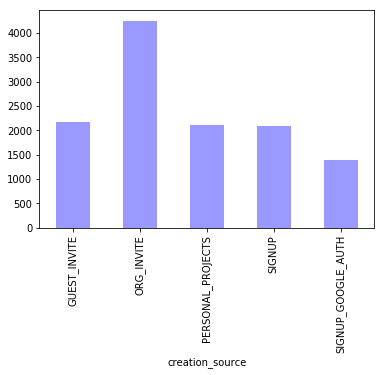

In [5]:
users.groupby('creation_source')['object_id'].count().plot(kind='bar',color='blue', alpha=0.4)
_ = plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

In [6]:
users['Year_Created'] = pd.DatetimeIndex(users['creation_time']).year
users['Month_Created'] = pd.DatetimeIndex(users['creation_time']).month

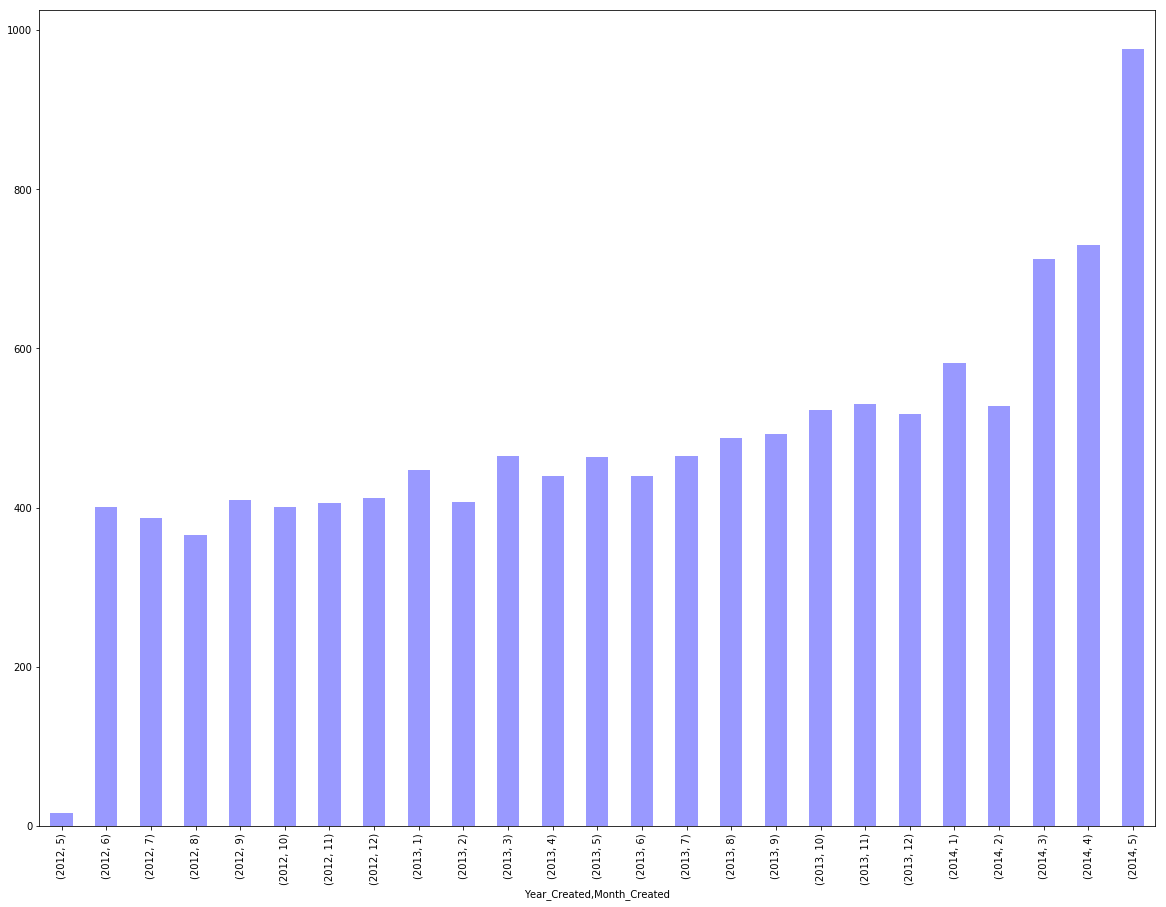

In [7]:
users.groupby(['Year_Created','Month_Created'])['object_id'].count().plot(kind='bar',color='blue', alpha=0.4)
plt.show()

In [8]:
usage_agg = usage.groupby(['user_id'])['visited'].sum().reset_index()

In [9]:
usage_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id    8823 non-null int64
visited    8823 non-null int64
dtypes: int64(2)
memory usage: 137.9 KB


In [10]:
users_usg_agg = pd.merge( users, usage_agg, left_on='object_id',right_on='user_id',how='left').fillna(0)

In [11]:
users_usg_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
Year_Created                  12000 non-null int64
Month_Created                 12000 non-null int64
user_id                       12000 non-null float64
visited                       12000 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.4+ MB


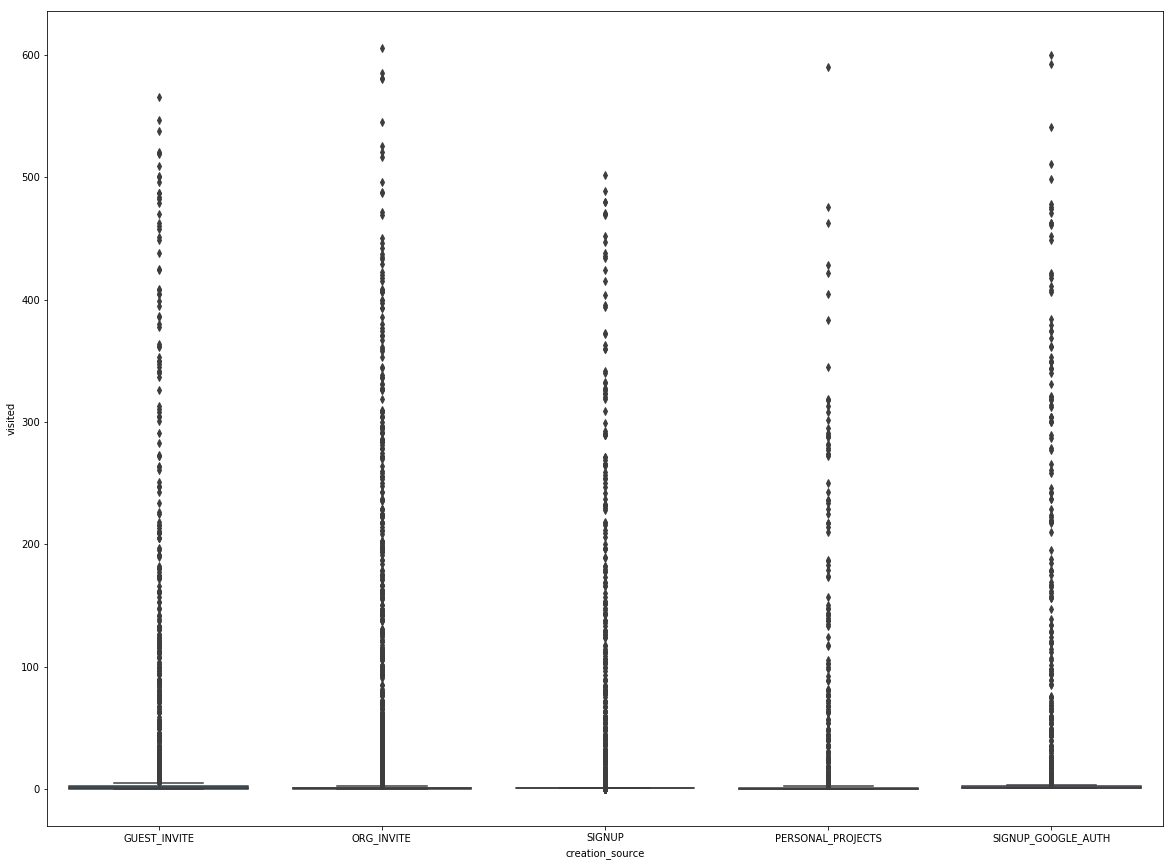

In [12]:
sns.boxplot(x='creation_source',y='visited',data=users_usg_agg)
plt.xlabel('creation_source')
plt.ylabel('visited')
plt.show()

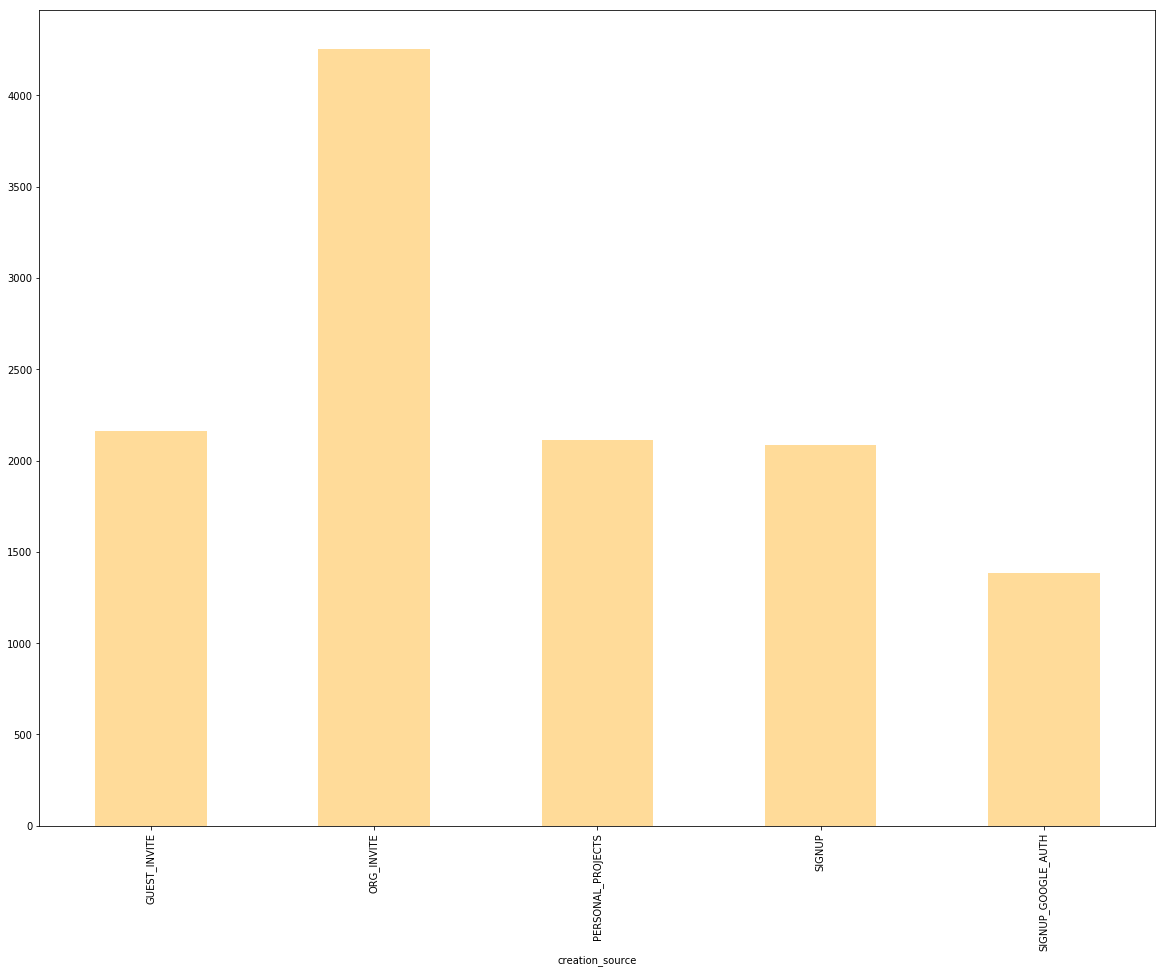

In [13]:
users_usg_agg.groupby('creation_source')['object_id'].count().plot(kind='bar',color='orange', alpha=0.4)
plt.show()

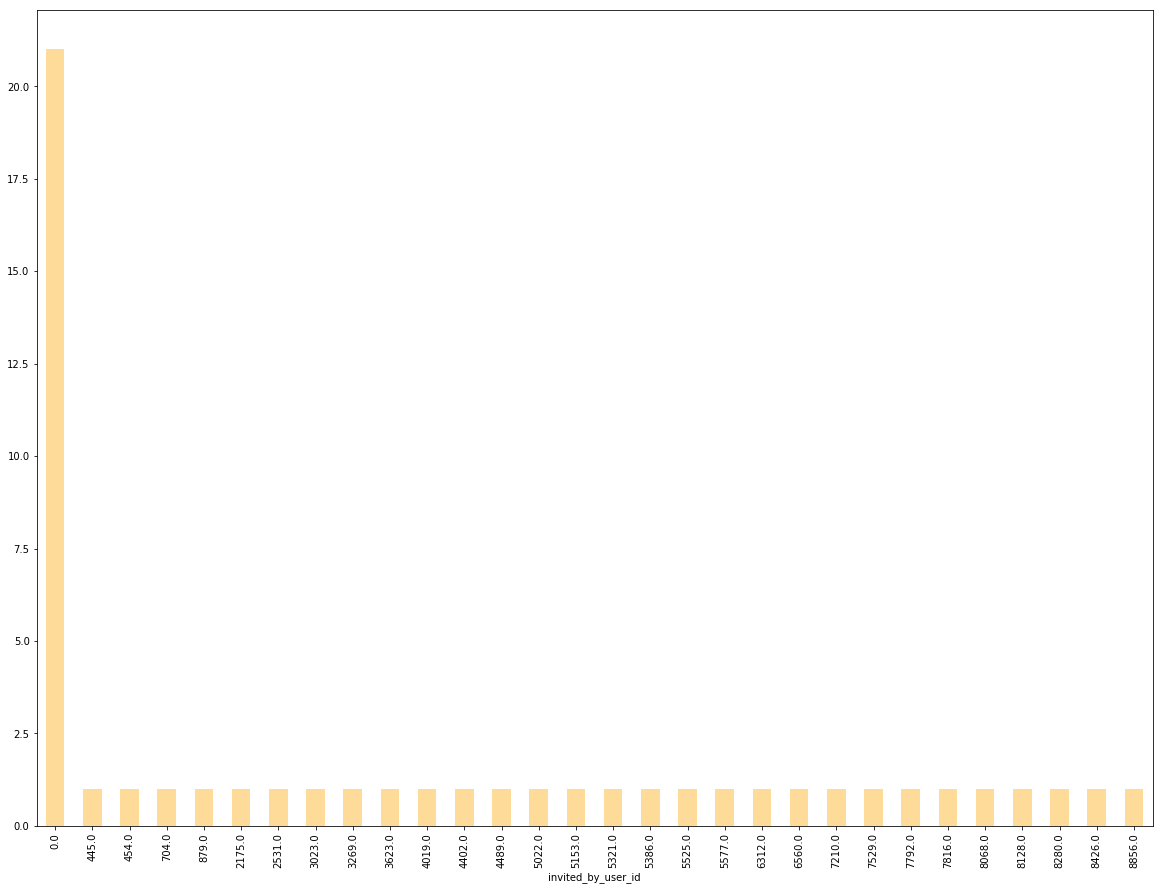

In [14]:
users_usg_agg_50 = users_usg_agg.nlargest(50,'visited')
users_usg_agg_50.groupby('invited_by_user_id')['object_id'].count().plot(kind='bar',color='orange', alpha=0.4)
plt.show()

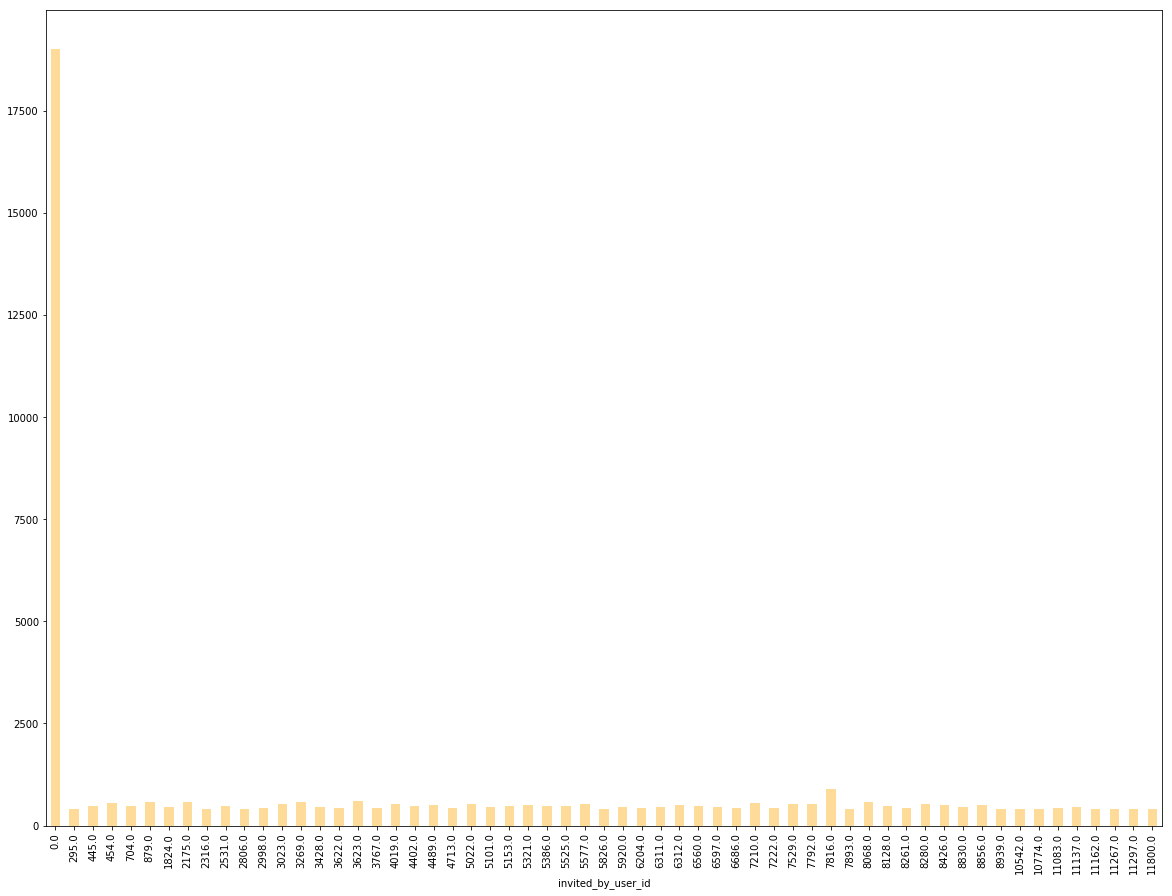

In [15]:
users_usg_agg_100 = users_usg_agg.nlargest(100,'visited')
users_usg_agg_100.groupby('invited_by_user_id')['visited'].sum().plot(kind='bar',color='orange', alpha=0.4)
plt.show()

In [18]:
from datetime import datetime, timedelta

def custom(x):
    """
    Takes property object x
    converts x to list
    returns 1 if a user logged into the product on three separate
    days in at least one seven day period 
    """
    if len(x) >= 3:  # condition to eliminate if user has less than 3 time stamps
        x = [i for i in x]  # convert property object to list
        x.sort()  # sort the dates in increasing order
        x = [x[i+1] - x[i] for i in range(len(x)-2)]  # compute cumulative difference of current and next day
        # sum i, i+1, i+2 terms and check if it`s less than 7 which gives if it`s in a seven day period
        x = [1 for i in range(len(x)-2) if x[i] + x[i+1] + x[i+2] <= timedelta(days=7)]
        # condition to check if there`s a 1 in x, return 1 if true
        if 1 in x:
            return 1
usage['time_stamp'] = pd.to_datetime(usage['time_stamp'])
df = usage.groupby('user_id').agg(custom)  # group by user_id and aggregate using custom function
df.fillna(0, inplace=True)  # fill null values with 0
df.columns = ['adopted_user']
df=df.reset_index()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id         8823 non-null int64
adopted_user    8823 non-null float64
dtypes: float64(1), int64(1)
memory usage: 137.9 KB


In [20]:
df['adopted_user'] = df['adopted_user'].astype(np.int)
#df['adopted_user'] = df['adopted_user'].astype(str)
df.head()

,user_id,adopted_user
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [21]:
adopted_users = pd.merge(df, users,left_on='user_id',right_on='object_id').fillna(0)
adopted_users.head(50)

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Year_Created,Month_Created
0,1,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,0,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,0,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,2012,12
7,10,1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1
8,11,0,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,0.0,2013,12
9,13,0,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,2014,3


In [22]:
adopted_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
user_id                       8823 non-null int64
adopted_user                  8823 non-null int64
object_id                     8823 non-null int64
creation_time                 8823 non-null object
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null float64
Year_Created                  8823 non-null int64
Month_Created                 8823 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 1.0+ MB


In [24]:
replace_creation_source = {"creation_source":     {"PERSONAL_PROJECTS": 1, "GUEST_INVITE": 2,"ORG_INVITE": 3,"SIGNUP": 4,"SIGNUP_GOOGLE_AUTH": 5}}
adopted_users.replace(replace_creation_source,inplace=True)

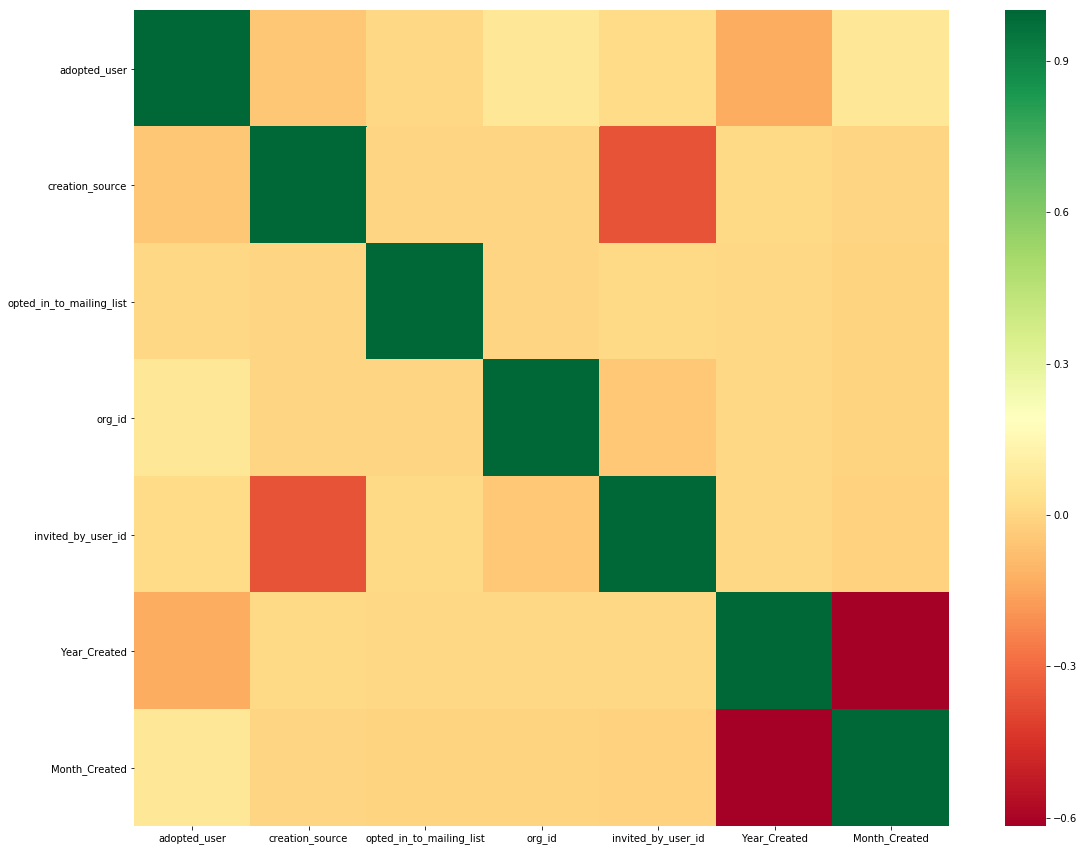

In [25]:
sns.heatmap(adopted_users.drop(['user_id','object_id','last_session_creation_time','name','creation_time','enabled_for_marketing_drip'],axis=1).corr(), square=True, cmap='RdYlGn')